In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1 사용하기

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2비활성화하고 v1을 활성화

## Tensorflow
- 그래프 정의 (tensor객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [7]:
# tensor = data(상수,변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [8]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [9]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]),  dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [11]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

2.5

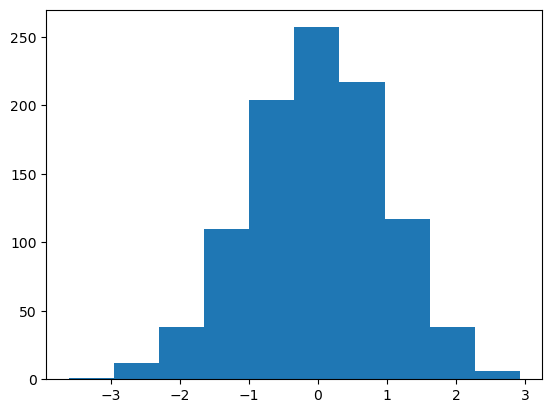

In [21]:
# tf.random_normal([size]) : 평균0이고, 표준편차가 1인 난수 size 개 발생. 난수갯수:독립변수갯수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균0, 표준편차가 1인 난수 2(정규분포 난수)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한  linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [28]:
# tensor 그래프(객체 흐름) 정의
#data set(x, y)
x = np.array([1,2,3])
y = np.array([1,2,3])
# weight와 bias (처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 결과는 넘파이 배열
H = W*x + b
# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습 목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강법)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session 생성
sess = tf.Session()
# tf.Variable 변수 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습 (v2에서의 fit함수)
for step in range(1, 6001):
    sess.run(train)
    print("{}번째 cost:{}, W:{}, b:{}".format(step, 
                                            sess.run(cost),
                                            sess.run(W),
                                            sess.run(b)))

1번째 cost:24.142602920532227, W:[-0.40792298], b:[-1.9612979]
2번째 cost:19.120567321777344, W:[-0.19806491], b:[-1.865755]
3번째 cost:15.150741577148438, W:[-0.01161533], b:[-1.7805172]
4번째 cost:12.012629508972168, W:[0.1540228], b:[-1.7044423]
5번째 cost:9.531941413879395, W:[0.30115837], b:[-1.6365143]
6번째 cost:7.5709147453308105, W:[0.43184417], b:[-1.5758303]
7번째 cost:6.020652770996094, W:[0.54790527], b:[-1.5215875]
8번째 cost:4.795081615447998, W:[0.65096426], b:[-1.4730719]
9번째 cost:3.826158285140991, W:[0.7424638], b:[-1.4296491]
10번째 cost:3.0601043701171875, W:[0.8236865], b:[-1.3907547]
11번째 cost:2.4544076919555664, W:[0.8957726], b:[-1.355887]
12번째 cost:1.9754663705825806, W:[0.95973593], b:[-1.3246002]
13번째 cost:1.5967191457748413, W:[1.016478], b:[-1.2964977]
14번째 cost:1.2971702814102173, W:[1.0667999], b:[-1.2712269]
15번째 cost:1.0602246522903442, W:[1.1114143], b:[-1.2484744]
16번째 cost:0.8727642893791199, W:[1.1509546], b:[-1.2279614]
17번째 cost:0.724419891834259, W:[1.185984], b:

180번째 cost:0.07661794871091843, W:[1.3214854], b:[-0.7308119]
181번째 cost:0.07625003159046173, W:[1.3207126], b:[-0.72905505]
182번째 cost:0.0758838951587677, W:[1.3199416], b:[-0.72730243]
183번째 cost:0.07551949471235275, W:[1.3191725], b:[-0.72555405]
184번째 cost:0.07515684515237808, W:[1.3184053], b:[-0.7238099]
185번째 cost:0.0747959241271019, W:[1.3176398], b:[-0.7220699]
186번째 cost:0.0744367316365242, W:[1.3168763], b:[-0.7203341]
187번째 cost:0.07407931238412857, W:[1.3161145], b:[-0.7186025]
188번째 cost:0.07372356206178665, W:[1.3153546], b:[-0.716875]
189번째 cost:0.07336952537298203, W:[1.3145965], b:[-0.7151517]
190번째 cost:0.07301720231771469, W:[1.3138403], b:[-0.71343255]
191번째 cost:0.07266657799482346, W:[1.3130858], b:[-0.7117175]
192번째 cost:0.07231763005256653, W:[1.3123331], b:[-0.7100066]
193번째 cost:0.0719703659415245, W:[1.3115823], b:[-0.7082998]
194번째 cost:0.07162473350763321, W:[1.3108333], b:[-0.7065971]
195번째 cost:0.07128078490495682, W:[1.3100861], b:[-0.7048985]
196번째 cos

369번째 cost:0.03084740787744522, W:[1.2039883], b:[-0.46371338]
370번째 cost:0.030699273571372032, W:[1.2034979], b:[-0.46259865]
371번째 cost:0.03055185079574585, W:[1.2030087], b:[-0.4614866]
372번째 cost:0.030405135825276375, W:[1.2025206], b:[-0.46037722]
373번째 cost:0.030259130522608757, W:[1.2020338], b:[-0.4592705]
374번째 cost:0.03011382184922695, W:[1.2015481], b:[-0.45816645]
375번째 cost:0.029969215393066406, W:[1.2010636], b:[-0.45706505]
376번째 cost:0.02982531301677227, W:[1.2005802], b:[-0.4559663]
377번째 cost:0.02968207187950611, W:[1.200098], b:[-0.45487016]
378번째 cost:0.029539547860622406, W:[1.199617], b:[-0.4537767]
379번째 cost:0.029397686943411827, W:[1.1991372], b:[-0.45268583]
380번째 cost:0.029256515204906464, W:[1.1986585], b:[-0.4515976]
381번째 cost:0.02911602519452572, W:[1.1981809], b:[-0.450512]
382번째 cost:0.028976207599043846, W:[1.1977046], b:[-0.44942898]
383번째 cost:0.0288370493799448, W:[1.1972293], b:[-0.44834858]
384번째 cost:0.02869858406484127, W:[1.1967552], b:[-0.4472

574번째 cost:0.011498920619487762, W:[1.1245444], b:[-0.28311893]
575번째 cost:0.011443696916103363, W:[1.124245], b:[-0.28243834]
576번째 cost:0.011388752609491348, W:[1.1239464], b:[-0.28175938]
577번째 cost:0.011334058828651905, W:[1.1236485], b:[-0.28108206]
578번째 cost:0.011279639787971973, W:[1.1233513], b:[-0.28040636]
579번째 cost:0.011225473135709763, W:[1.1230547], b:[-0.2797323]
580번째 cost:0.011171575635671616, W:[1.122759], b:[-0.27905983]
581번째 cost:0.011117926798760891, W:[1.1224638], b:[-0.27838898]
582번째 cost:0.01106452289968729, W:[1.1221694], b:[-0.27771977]
583번째 cost:0.011011388152837753, W:[1.1218756], b:[-0.27705213]
584번째 cost:0.01095852255821228, W:[1.1215826], b:[-0.2763861]
585번째 cost:0.010905899107456207, W:[1.1212903], b:[-0.2757217]
586번째 cost:0.010853511281311512, W:[1.1209987], b:[-0.27505887]
587번째 cost:0.01080139260739088, W:[1.1207079], b:[-0.27439764]
588번째 cost:0.01074953656643629, W:[1.1204177], b:[-0.273738]
589번째 cost:0.010697916150093079, W:[1.1201283], b:[

771번째 cost:0.004454726353287697, W:[1.0775186], b:[-0.17621817]
772번째 cost:0.004433330148458481, W:[1.0773323], b:[-0.17579454]
773번째 cost:0.004412037320435047, W:[1.0771464], b:[-0.17537194]
774번째 cost:0.004390849731862545, W:[1.0769609], b:[-0.17495036]
775번째 cost:0.004369764123111963, W:[1.0767759], b:[-0.17452979]
776번째 cost:0.004348780959844589, W:[1.0765914], b:[-0.17411023]
777번째 cost:0.004327898845076561, W:[1.0764073], b:[-0.17369169]
778번째 cost:0.004307120107114315, W:[1.0762236], b:[-0.17327414]
779번째 cost:0.0042864419519901276, W:[1.0760404], b:[-0.17285761]
780번째 cost:0.004265854600816965, W:[1.0758576], b:[-0.17244208]
781번째 cost:0.004245369229465723, W:[1.0756752], b:[-0.17202754]
782번째 cost:0.00422498257830739, W:[1.0754933], b:[-0.171614]
783번째 cost:0.004204694647341967, W:[1.0753119], b:[-0.17120145]
784번째 cost:0.004184498451650143, W:[1.0751308], b:[-0.1707899]
785번째 cost:0.004164408426731825, W:[1.0749502], b:[-0.17037933]
786번째 cost:0.004144415725022554, W:[1.07477

968번째 cost:0.0017257774015888572, W:[1.048249], b:[-0.10968132]
969번째 cost:0.0017174928216263652, W:[1.048133], b:[-0.10941765]
970번째 cost:0.001709242002107203, W:[1.0480173], b:[-0.10915462]
971번째 cost:0.0017010342562571168, W:[1.0479019], b:[-0.10889222]
972번째 cost:0.001692865858785808, W:[1.0477867], b:[-0.10863045]
973번째 cost:0.001684735994786024, W:[1.0476718], b:[-0.10836931]
974번째 cost:0.001676643267273903, W:[1.0475572], b:[-0.10810879]
975번째 cost:0.001668594777584076, W:[1.0474429], b:[-0.10784891]
976번째 cost:0.0016605788841843605, W:[1.0473288], b:[-0.10758964]
977번째 cost:0.0016526104882359505, W:[1.0472151], b:[-0.107331]
978번째 cost:0.0016446748049929738, W:[1.0471016], b:[-0.10707299]
979번째 cost:0.0016367713687941432, W:[1.0469884], b:[-0.10681559]
980번째 cost:0.001628910773433745, W:[1.0468754], b:[-0.10655881]
981번째 cost:0.001621091621927917, W:[1.0467627], b:[-0.10630265]
982번째 cost:0.001613304135389626, W:[1.0466503], b:[-0.1060471]
983번째 cost:0.0016055592568591237, W:[1

1156번째 cost:0.0006981754559092224, W:[1.0306888], b:[-0.06976255]
1157번째 cost:0.000694824440870434, W:[1.030615], b:[-0.06959485]
1158번째 cost:0.0006914865225553513, W:[1.0305414], b:[-0.06942756]
1159번째 cost:0.0006881658919155598, W:[1.030468], b:[-0.06926066]
1160번째 cost:0.0006848617922514677, W:[1.0303948], b:[-0.06909417]
1161번째 cost:0.0006815748638473451, W:[1.0303217], b:[-0.06892809]
1162번째 cost:0.0006783015560358763, W:[1.0302488], b:[-0.06876239]
1163번째 cost:0.0006750407628715038, W:[1.030176], b:[-0.06859709]
1164번째 cost:0.0006718005170114338, W:[1.0301034], b:[-0.06843219]
1165번째 cost:0.0006685727275907993, W:[1.0300311], b:[-0.06826768]
1166번째 cost:0.0006653652526438236, W:[1.0299588], b:[-0.06810357]
1167번째 cost:0.0006621701759286225, W:[1.0298868], b:[-0.06793985]
1168번째 cost:0.0006589883123524487, W:[1.029815], b:[-0.06777652]
1169번째 cost:0.0006558257737196982, W:[1.0297433], b:[-0.06761359]
1170번째 cost:0.0006526762153953314, W:[1.0296718], b:[-0.06745105]
1171번째 cost:0.0

1344번째 cost:0.0002824561670422554, W:[1.0195196], b:[-0.04437272]
1345번째 cost:0.00028109957929700613, W:[1.0194726], b:[-0.04426605]
1346번째 cost:0.0002797483466565609, W:[1.0194257], b:[-0.04415964]
1347번째 cost:0.0002784047683235258, W:[1.019379], b:[-0.04405347]
1348번째 cost:0.00027706872788257897, W:[1.0193324], b:[-0.04394756]
1349번째 cost:0.0002757380425464362, W:[1.0192859], b:[-0.04384191]
1350번째 cost:0.00027441492420621216, W:[1.0192395], b:[-0.04373651]
1351번째 cost:0.0002730970736593008, W:[1.0191933], b:[-0.04363136]
1352번째 cost:0.00027178452000953257, W:[1.0191472], b:[-0.04352647]
1353번째 cost:0.0002704793296288699, W:[1.0191011], b:[-0.04342182]
1354번째 cost:0.0002691794070415199, W:[1.0190552], b:[-0.04331743]
1355번째 cost:0.0002678868477232754, W:[1.0190095], b:[-0.04321329]
1356번째 cost:0.0002666016516741365, W:[1.0189638], b:[-0.04310941]
1357번째 cost:0.00026532160700298846, W:[1.0189183], b:[-0.04300577]
1358번째 cost:0.0002640488964971155, W:[1.0188729], b:[-0.04290239]
1359번째

1499번째 cost:0.0001339423470199108, W:[1.0134418], b:[-0.03055616]
1500번째 cost:0.00013329842477105558, W:[1.0134095], b:[-0.03048271]
1501번째 cost:0.00013266003224998713, W:[1.0133773], b:[-0.03040943]
1502번째 cost:0.00013202142145019025, W:[1.0133451], b:[-0.03033634]
1503번째 cost:0.00013138828217051923, W:[1.013313], b:[-0.03026341]
1504번째 cost:0.00013075793685857207, W:[1.013281], b:[-0.03019067]
1505번째 cost:0.00013012999261263758, W:[1.013249], b:[-0.0301181]
1506번째 cost:0.00012950442032888532, W:[1.0132172], b:[-0.0300457]
1507번째 cost:0.00012888159835711122, W:[1.0131854], b:[-0.02997347]
1508번째 cost:0.00012826417514588684, W:[1.0131537], b:[-0.02990142]
1509번째 cost:0.00012764758139383048, W:[1.0131221], b:[-0.02982954]
1510번째 cost:0.00012703370884992182, W:[1.0130905], b:[-0.02975783]
1511번째 cost:0.000126423648907803, W:[1.013059], b:[-0.02968629]
1512번째 cost:0.00012581741611938924, W:[1.0130277], b:[-0.02961492]
1513번째 cost:0.00012521387543529272, W:[1.0129963], b:[-0.02954373]
1514

1645번째 cost:6.632752774748951e-05, W:[1.0094589], b:[-0.02150254]
1646번째 cost:6.600945926038548e-05, W:[1.0094361], b:[-0.02145084]
1647번째 cost:6.569253309862688e-05, W:[1.0094135], b:[-0.02139927]
1648번째 cost:6.53770039207302e-05, W:[1.0093908], b:[-0.02134783]
1649번째 cost:6.506259524030611e-05, W:[1.0093683], b:[-0.0212965]
1650번째 cost:6.475066038547084e-05, W:[1.0093458], b:[-0.0212453]
1651번째 cost:6.443983147619292e-05, W:[1.0093234], b:[-0.02119423]
1652번째 cost:6.413037772290409e-05, W:[1.009301], b:[-0.02114328]
1653번째 cost:6.382229184964672e-05, W:[1.0092785], b:[-0.02109245]
1654번째 cost:6.351529737003148e-05, W:[1.0092562], b:[-0.02104174]
1655번째 cost:6.321072578430176e-05, W:[1.009234], b:[-0.02099116]
1656번째 cost:6.290721648838371e-05, W:[1.0092118], b:[-0.02094069]
1657번째 cost:6.260504596866667e-05, W:[1.0091896], b:[-0.02089035]
1658번째 cost:6.230395229067653e-05, W:[1.0091676], b:[-0.02084013]
1659번째 cost:6.200523785082623e-05, W:[1.0091455], b:[-0.02079003]
1660번째 cost:6.1

1792번째 cost:3.268730142735876e-05, W:[1.0066403], b:[-0.01509497]
1793번째 cost:3.253107934142463e-05, W:[1.0066243], b:[-0.01505868]
1794번째 cost:3.237402415834367e-05, W:[1.0066084], b:[-0.01502248]
1795번째 cost:3.221898077754304e-05, W:[1.0065925], b:[-0.01498637]
1796번째 cost:3.2064624974736944e-05, W:[1.0065767], b:[-0.01495034]
1797번째 cost:3.1910200050333515e-05, W:[1.0065608], b:[-0.0149144]
1798번째 cost:3.17570120387245e-05, W:[1.0065451], b:[-0.01487854]
1799번째 cost:3.1604504329152405e-05, W:[1.0065293], b:[-0.01484278]
1800번째 cost:3.1452669645659626e-05, W:[1.0065136], b:[-0.01480709]
1801번째 cost:3.1302060961024836e-05, W:[1.006498], b:[-0.0147715]
1802번째 cost:3.11513758788351e-05, W:[1.0064824], b:[-0.01473598]
1803번째 cost:3.100135290878825e-05, W:[1.0064667], b:[-0.01470056]
1804번째 cost:3.085329444729723e-05, W:[1.0064512], b:[-0.01466522]
1805번째 cost:3.0704410164617e-05, W:[1.0064358], b:[-0.01462996]
1806번째 cost:3.0557665013475344e-05, W:[1.0064203], b:[-0.01459479]
1807번째 cost

1943번째 cost:1.58020975504769e-05, W:[1.0046169], b:[-0.01049529]
1944번째 cost:1.5725961930002086e-05, W:[1.0046058], b:[-0.01047006]
1945번째 cost:1.565015918458812e-05, W:[1.0045947], b:[-0.01044489]
1946번째 cost:1.5575218640151434e-05, W:[1.0045836], b:[-0.01041978]
1947번째 cost:1.5500472727580927e-05, W:[1.0045726], b:[-0.01039473]
1948번째 cost:1.5426063328050077e-05, W:[1.0045617], b:[-0.01036974]
1949번째 cost:1.5351984984590672e-05, W:[1.0045507], b:[-0.01034481]
1950번째 cost:1.52782322402345e-05, W:[1.0045397], b:[-0.01031994]
1951번째 cost:1.520480236649746e-05, W:[1.0045288], b:[-0.01029513]
1952번째 cost:1.5131561667658389e-05, W:[1.0045179], b:[-0.01027038]
1953번째 cost:1.5059163160913158e-05, W:[1.0045071], b:[-0.01024569]
1954번째 cost:1.4987087524787057e-05, W:[1.0044962], b:[-0.01022106]
1955번째 cost:1.4914815437805373e-05, W:[1.0044854], b:[-0.01019649]
1956번째 cost:1.4843241842754651e-05, W:[1.0044746], b:[-0.01017197]
1957번째 cost:1.4771991118323058e-05, W:[1.0044639], b:[-0.01014752]
1

2088번째 cost:7.863373866712209e-06, W:[1.0032569], b:[-0.0074035]
2089번째 cost:7.825216016499326e-06, W:[1.003249], b:[-0.00738571]
2090번째 cost:7.787972208461724e-06, W:[1.0032412], b:[-0.00736796]
2091번째 cost:7.750422810204327e-06, W:[1.0032334], b:[-0.00735025]
2092번째 cost:7.713039849477354e-06, W:[1.0032257], b:[-0.00733258]
2093번째 cost:7.67619440011913e-06, W:[1.0032179], b:[-0.00731496]
2094번째 cost:7.639514478796627e-06, W:[1.0032102], b:[-0.00729737]
2095번째 cost:7.602625828440068e-06, W:[1.0032024], b:[-0.00727983]
2096번째 cost:7.565895884908969e-06, W:[1.0031947], b:[-0.00726234]
2097번째 cost:7.529599315603264e-06, W:[1.0031871], b:[-0.00724488]
2098번째 cost:7.493466455343878e-06, W:[1.0031794], b:[-0.00722746]
2099번째 cost:7.457495030394057e-06, W:[1.0031718], b:[-0.00721009]
2100번째 cost:7.421682312269695e-06, W:[1.0031642], b:[-0.00719276]
2101번째 cost:7.386028300970793e-06, W:[1.0031565], b:[-0.00717547]
2102번째 cost:7.3505302680132445e-06, W:[1.0031489], b:[-0.00715822]
2103번째 cost:

2248번째 cost:3.6404962884262204e-06, W:[1.0022161], b:[-0.00503753]
2249번째 cost:3.6231260764907347e-06, W:[1.0022107], b:[-0.00502543]
2250번째 cost:3.6055771488463506e-06, W:[1.0022054], b:[-0.00501335]
2251번째 cost:3.5882919746654807e-06, W:[1.0022001], b:[-0.0050013]
2252번째 cost:3.5710861538973404e-06, W:[1.0021949], b:[-0.00498928]
2253번째 cost:3.5539578675525263e-06, W:[1.0021896], b:[-0.00497729]
2254번째 cost:3.5369073430047138e-06, W:[1.0021844], b:[-0.00496533]
2255번째 cost:3.519932533890824e-06, W:[1.0021791], b:[-0.0049534]
2256번째 cost:3.50303275808983e-06, W:[1.0021739], b:[-0.00494149]
2257번째 cost:3.486207106107031e-06, W:[1.0021687], b:[-0.00492962]
2258번째 cost:3.4694546684477245e-06, W:[1.0021634], b:[-0.00491777]
2259번째 cost:3.4527747629908845e-06, W:[1.0021582], b:[-0.00490595]
2260번째 cost:3.4361655707471073e-06, W:[1.0021529], b:[-0.00489416]
2261번째 cost:3.4198135381302563e-06, W:[1.0021478], b:[-0.0048824]
2262번째 cost:3.4032882467727177e-06, W:[1.0021427], b:[-0.00487066]
22

2398번째 cost:1.7687617628325825e-06, W:[1.0015447], b:[-0.00351133]
2399번째 cost:1.7601881836526445e-06, W:[1.001541], b:[-0.00350289]
2400번째 cost:1.7518299273433513e-06, W:[1.0015373], b:[-0.00349447]
2401번째 cost:1.7435094150641817e-06, W:[1.0015336], b:[-0.00348608]
2402번째 cost:1.7350494090351276e-06, W:[1.0015299], b:[-0.0034777]
2403번째 cost:1.7266256691073067e-06, W:[1.0015262], b:[-0.00346934]
2404번째 cost:1.718413841444999e-06, W:[1.0015225], b:[-0.00346101]
2405번째 cost:1.710238052510249e-06, W:[1.0015188], b:[-0.00345269]
2406번째 cost:1.701922542451939e-06, W:[1.0015152], b:[-0.00344439]
2407번째 cost:1.693641820565972e-06, W:[1.0015115], b:[-0.00343611]
2408번째 cost:1.68569965808274e-06, W:[1.0015079], b:[-0.00342784]
2409번째 cost:1.6774483810877427e-06, W:[1.0015043], b:[-0.0034196]
2410번째 cost:1.6695803424227051e-06, W:[1.0015007], b:[-0.00341138]
2411번째 cost:1.6614039850537665e-06, W:[1.0014971], b:[-0.00340318]
2412번째 cost:1.6536083649043576e-06, W:[1.0014936], b:[-0.003395]
2413번째

2548번째 cost:8.595880558459612e-07, W:[1.0010769], b:[-0.0024478]
2549번째 cost:8.554549708605919e-07, W:[1.0010743], b:[-0.00244192]
2550번째 cost:8.513391094311373e-07, W:[1.0010717], b:[-0.00243606]
2551번째 cost:8.472406989312731e-07, W:[1.0010691], b:[-0.0024302]
2552번째 cost:8.431591140833916e-07, W:[1.0010664], b:[-0.00242436]
2553번째 cost:8.39186213852372e-07, W:[1.001064], b:[-0.00241853]
2554번째 cost:8.351101428161201e-07, W:[1.0010614], b:[-0.00241272]
2555번째 cost:8.31052886951511e-07, W:[1.0010589], b:[-0.00240692]
2556번째 cost:8.271361480183259e-07, W:[1.0010564], b:[-0.00240114]
2557번째 cost:8.232381674133649e-07, W:[1.0010539], b:[-0.00239538]
2558번째 cost:8.192369591597526e-07, W:[1.0010514], b:[-0.00238963]
2559번째 cost:8.152535997396626e-07, W:[1.0010489], b:[-0.00238389]
2560번째 cost:8.114086540444987e-07, W:[1.0010464], b:[-0.00237817]
2561번째 cost:8.075814434960193e-07, W:[1.0010439], b:[-0.00237246]
2562번째 cost:8.036514032028208e-07, W:[1.0010414], b:[-0.00236677]
2563번째 cost:7.9

2688번째 cost:4.384339433727291e-07, W:[1.000769], b:[-0.00174832]
2689번째 cost:4.3638235069920484e-07, W:[1.0007672], b:[-0.00174411]
2690번째 cost:4.343412740581698e-07, W:[1.0007654], b:[-0.00173992]
2691번째 cost:4.3222223666816717e-07, W:[1.0007637], b:[-0.00173574]
2692번째 cost:4.3011303318962746e-07, W:[1.0007619], b:[-0.00173157]
2693번째 cost:4.2810151512640005e-07, W:[1.0007601], b:[-0.00172741]
2694번째 cost:4.26099859396345e-07, W:[1.0007583], b:[-0.00172327]
2695번째 cost:4.240204134475789e-07, W:[1.0007565], b:[-0.00171914]
2696번째 cost:4.219503750846343e-07, W:[1.0007547], b:[-0.00171501]
2697번째 cost:4.199765442081116e-07, W:[1.0007529], b:[-0.0017109]
2698번째 cost:4.180121493391198e-07, W:[1.0007511], b:[-0.0017068]
2699번째 cost:4.1597022004680184e-07, W:[1.0007493], b:[-0.00170271]
2700번째 cost:4.139371583278262e-07, W:[1.0007476], b:[-0.00169863]
2701번째 cost:4.119991388051858e-07, W:[1.0007458], b:[-0.00169456]
2702번째 cost:4.1006993001246883e-07, W:[1.000744], b:[-0.0016905]
2703번째 cos

2830번째 cost:2.2170543445554358e-07, W:[1.0005472], b:[-0.00124303]
2831번째 cost:2.206139839699972e-07, W:[1.0005459], b:[-0.00124006]
2832번째 cost:2.1959014873118576e-07, W:[1.0005445], b:[-0.00123709]
2833번째 cost:2.1857091780930205e-07, W:[1.0005432], b:[-0.00123413]
2834번째 cost:2.1749356449163315e-07, W:[1.0005419], b:[-0.00123118]
2835번째 cost:2.1642063074978068e-07, W:[1.0005406], b:[-0.00122823]
2836번째 cost:2.1541434591654252e-07, W:[1.0005393], b:[-0.00122529]
2837번째 cost:2.1441253750253964e-07, W:[1.000538], b:[-0.00122236]
2838번째 cost:2.1335301880753832e-07, W:[1.0005367], b:[-0.00121943]
2839번째 cost:2.122977065255327e-07, W:[1.0005354], b:[-0.00121651]
2840번째 cost:2.1130824734427733e-07, W:[1.000534], b:[-0.00121359]
2841번째 cost:2.103230372085818e-07, W:[1.0005327], b:[-0.00121068]
2842번째 cost:2.0928059996094817e-07, W:[1.0005314], b:[-0.00120778]
2843번째 cost:2.0824218438519893e-07, W:[1.0005301], b:[-0.00120488]
2844번째 cost:2.0726879768062645e-07, W:[1.0005288], b:[-0.00120199]


2973번째 cost:1.1159520596493167e-07, W:[1.0003881], b:[-0.00088192]
2974번째 cost:1.1105895936225352e-07, W:[1.0003872], b:[-0.00087981]
2975번째 cost:1.1052485859863737e-07, W:[1.0003862], b:[-0.0008777]
2976번째 cost:1.0999290367408321e-07, W:[1.0003853], b:[-0.00087559]
2977번째 cost:1.0946306616688162e-07, W:[1.0003843], b:[-0.00087349]
2978번째 cost:1.0893531765532316e-07, W:[1.0003834], b:[-0.0008714]
2979번째 cost:1.0840964392855312e-07, W:[1.0003824], b:[-0.0008693]
2980번째 cost:1.078860449865715e-07, W:[1.0003815], b:[-0.00086721]
2981번째 cost:1.0736444977510473e-07, W:[1.0003805], b:[-0.00086513]
2982번째 cost:1.0684490092671695e-07, W:[1.0003796], b:[-0.00086305]
2983번째 cost:1.0632734159798929e-07, W:[1.0003786], b:[-0.00086097]
2984번째 cost:1.0581174336721233e-07, W:[1.0003777], b:[-0.00085889]
2985번째 cost:1.0533049277228201e-07, W:[1.0003768], b:[-0.00085682]
2986번째 cost:1.0481982570809123e-07, W:[1.0003759], b:[-0.00085476]
2987번째 cost:1.0430003527517329e-07, W:[1.000375], b:[-0.0008527]
2

3111번째 cost:5.7542703046919996e-08, W:[1.0002785], b:[-0.0006334]
3112번째 cost:5.725420137991932e-08, W:[1.0002779], b:[-0.00063187]
3113번째 cost:5.700748317849502e-08, W:[1.0002772], b:[-0.00063034]
3114번째 cost:5.66980418170715e-08, W:[1.0002764], b:[-0.00062882]
3115번째 cost:5.6444907414743284e-08, W:[1.0002759], b:[-0.0006273]
3116번째 cost:5.619353871111343e-08, W:[1.0002753], b:[-0.00062579]
3117번째 cost:5.5888438765805404e-08, W:[1.0002745], b:[-0.00062429]
3118번째 cost:5.563936156249838e-08, W:[1.000274], b:[-0.00062278]
3119번째 cost:5.536836056307948e-08, W:[1.0002732], b:[-0.00062128]
3120번째 cost:5.509023992544826e-08, W:[1.0002726], b:[-0.00061979]
3121번째 cost:5.4845042285478485e-08, W:[1.000272], b:[-0.0006183]
3122번째 cost:5.457793506025155e-08, W:[1.0002713], b:[-0.00061681]
3123번째 cost:5.430377214565851e-08, W:[1.0002707], b:[-0.00061533]
3124번째 cost:5.406227288062837e-08, W:[1.0002701], b:[-0.00061385]
3125번째 cost:5.379891021561889e-08, W:[1.0002694], b:[-0.00061238]
3126번째 cost:

3267번째 cost:2.728000758622784e-08, W:[1.000192], b:[-0.00043609]
3268번째 cost:2.7149049230956734e-08, W:[1.0001916], b:[-0.00043505]
3269번째 cost:2.701859536102802e-08, W:[1.0001911], b:[-0.00043401]
3270번째 cost:2.6888633541943818e-08, W:[1.0001906], b:[-0.00043297]
3271번째 cost:2.6759158444633613e-08, W:[1.0001901], b:[-0.00043193]
3272번째 cost:2.6630170069097403e-08, W:[1.0001897], b:[-0.0004309]
3273번째 cost:2.650166663897835e-08, W:[1.0001892], b:[-0.00042987]
3274번째 cost:2.6373635719778576e-08, W:[1.0001887], b:[-0.00042884]
3275번째 cost:2.6246079087854923e-08, W:[1.0001882], b:[-0.00042781]
3276번째 cost:2.611899674320739e-08, W:[1.0001878], b:[-0.00042678]
3277번째 cost:2.599237802769494e-08, W:[1.0001873], b:[-0.00042575]
3278번째 cost:2.5866221164960734e-08, W:[1.0001868], b:[-0.00042473]
3279번째 cost:2.5740524378647933e-08, W:[1.0001863], b:[-0.00042371]
3280번째 cost:2.561528056332918e-08, W:[1.0001858], b:[-0.00042268]
3281번째 cost:2.5490487942647633e-08, W:[1.0001854], b:[-0.00042166]
328

3412번째 cost:1.3613934868317301e-08, W:[1.0001353], b:[-0.00030825]
3413번째 cost:1.3565716550090201e-08, W:[1.0001351], b:[-0.0003075]
3414번째 cost:1.349129075123301e-08, W:[1.0001347], b:[-0.00030675]
3415번째 cost:1.3417083444267064e-08, W:[1.0001343], b:[-0.000306]
3416번째 cost:1.336976307442228e-08, W:[1.0001341], b:[-0.00030526]
3417번째 cost:1.3296354239855646e-08, W:[1.0001338], b:[-0.00030452]
3418번째 cost:1.3223156791752899e-08, W:[1.0001334], b:[-0.00030378]
3419번째 cost:1.3176678415049992e-08, W:[1.0001332], b:[-0.00030304]
3420번째 cost:1.3104251017637125e-08, W:[1.0001328], b:[-0.0003023]
3421번째 cost:1.303202612490395e-08, W:[1.0001324], b:[-0.00030157]
3422번째 cost:1.2986345332421934e-08, W:[1.0001322], b:[-0.00030083]
3423번째 cost:1.2914866509561307e-08, W:[1.0001318], b:[-0.00030011]
3424번째 cost:1.2843581309596175e-08, W:[1.0001315], b:[-0.00029938]
3425번째 cost:1.2798653692414064e-08, W:[1.0001312], b:[-0.00029865]
3426번째 cost:1.2728087028790469e-08, W:[1.0001309], b:[-0.00029793]
34

3568번째 cost:6.495483262369817e-09, W:[1.0000937], b:[-0.00021275]
3569번째 cost:6.464208279766126e-09, W:[1.0000935], b:[-0.00021224]
3570번째 cost:6.433041210840429e-09, W:[1.0000932], b:[-0.00021173]
3571번째 cost:6.401982499681935e-09, W:[1.000093], b:[-0.00021123]
3572번째 cost:6.371029481755386e-09, W:[1.0000927], b:[-0.00021072]
3573번째 cost:6.3401830452392005e-09, W:[1.0000925], b:[-0.00021022]
3574번째 cost:6.30944141377654e-09, W:[1.0000923], b:[-0.00020971]
3575번째 cost:6.278804587367404e-09, W:[1.000092], b:[-0.00020921]
3576번째 cost:6.2482716778333725e-09, W:[1.0000918], b:[-0.00020871]
3577번째 cost:6.217842241085236e-09, W:[1.0000916], b:[-0.0002082]
3578번째 cost:6.187516721212205e-09, W:[1.0000913], b:[-0.0002077]
3579번째 cost:6.15729200958981e-09, W:[1.0000911], b:[-0.0002072]
3580번째 cost:6.12716988257489e-09, W:[1.0000908], b:[-0.0002067]
3581번째 cost:6.097148119721396e-09, W:[1.0000906], b:[-0.0002062]
3582번째 cost:6.067228053296958e-09, W:[1.0000904], b:[-0.0002057]
3583번째 cost:6.03740

3709번째 cost:3.279603033590206e-09, W:[1.0000666], b:[-0.00015125]
3710번째 cost:3.2685185669123484e-09, W:[1.0000665], b:[-0.00015089]
3711번째 cost:3.2576066288925176e-09, W:[1.0000664], b:[-0.00015053]
3712번째 cost:3.239108314900818e-09, W:[1.0000663], b:[-0.00015018]
3713번째 cost:3.222477618081143e-09, W:[1.000066], b:[-0.00014983]
3714번째 cost:3.211715338125032e-09, W:[1.0000659], b:[-0.00014947]
3715번째 cost:3.193422415392888e-09, W:[1.0000658], b:[-0.00014912]
3716번째 cost:3.1752358520265034e-09, W:[1.0000657], b:[-0.00014877]
3717번째 cost:3.164807971245409e-09, W:[1.0000656], b:[-0.00014842]
3718번째 cost:3.148551419585033e-09, W:[1.0000653], b:[-0.00014807]
3719번째 cost:3.130554704355859e-09, W:[1.0000652], b:[-0.00014773]
3720번째 cost:3.120253166954967e-09, W:[1.0000651], b:[-0.00014738]
3721번째 cost:3.1041862413871968e-09, W:[1.0000648], b:[-0.00014704]
3722번째 cost:3.0863747113585305e-09, W:[1.0000647], b:[-0.00014669]
3723번째 cost:3.076193744178113e-09, W:[1.0000646], b:[-0.00014634]
3724번째

3976번째 cost:9.179861870656225e-10, W:[1.0000349], b:[-7.9990044e-05]
3977번째 cost:9.112107179909401e-10, W:[1.0000348], b:[-7.978817e-05]
3978번째 cost:9.071149942307954e-10, W:[1.0000348], b:[-7.958477e-05]
3979번째 cost:9.004153533886949e-10, W:[1.0000347], b:[-7.938544e-05]
3980번째 cost:8.976199783461425e-10, W:[1.0000346], b:[-7.918453e-05]
3981번째 cost:8.936257844815998e-10, W:[1.0000346], b:[-7.898367e-05]
3982번째 cost:8.909176174576316e-10, W:[1.0000345], b:[-7.878683e-05]
3983번째 cost:8.84316841975874e-10, W:[1.0000343], b:[-7.858995e-05]
3984번째 cost:8.777408244675655e-10, W:[1.0000342], b:[-7.839144e-05]
3985번째 cost:8.737768286692926e-10, W:[1.0000342], b:[-7.819133e-05]
3986번째 cost:8.711147914119977e-10, W:[1.0000341], b:[-7.799523e-05]
3987번째 cost:8.684580277140697e-10, W:[1.000034], b:[-7.779908e-05]
3988번째 cost:8.619787661423572e-10, W:[1.0000339], b:[-7.7602876e-05]
3989번째 cost:8.581038102306593e-10, W:[1.0000339], b:[-7.7405035e-05]
3990번째 cost:8.51695158843313e-10, W:[1.0000337]

4207번째 cost:3.004865800626533e-10, W:[1.0000201], b:[-4.565208e-05]
4208번째 cost:2.9936594869717226e-10, W:[1.0000201], b:[-4.5545687e-05]
4209번째 cost:2.964123113624595e-10, W:[1.00002], b:[-4.5441422e-05]
4210번째 cost:2.9526306399851876e-10, W:[1.00002], b:[-4.533368e-05]
4211번째 cost:2.9415933577858766e-10, W:[1.00002], b:[-4.522809e-05]
4212번째 cost:2.91244611760888e-10, W:[1.0000199], b:[-4.5124616e-05]
4213번째 cost:2.9011182345328734e-10, W:[1.0000199], b:[-4.501765e-05]
4214번째 cost:2.8902391591145715e-10, W:[1.0000199], b:[-4.491282e-05]
4215번째 cost:2.879790572674068e-10, W:[1.0000199], b:[-4.4810087e-05]
4216번째 cost:2.8739952084855247e-10, W:[1.0000198], b:[-4.470941e-05]
4217번째 cost:2.863566050947952e-10, W:[1.0000198], b:[-4.460677e-05]
4218번째 cost:2.8578342470275686e-10, W:[1.0000197], b:[-4.4506185e-05]
4219번째 cost:2.8474234081699024e-10, W:[1.0000197], b:[-4.4403638e-05]
4220번째 cost:2.8187605027873985e-10, W:[1.0000196], b:[-4.4303142e-05]
4221번째 cost:2.8080424097076673e-10, W:[

4332번째 cost:1.7273560359853946e-10, W:[1.0000154], b:[-3.4517976e-05]
4333번째 cost:1.721869452575575e-10, W:[1.0000154], b:[-3.4443532e-05]
4334번째 cost:1.7006603070246484e-10, W:[1.0000153], b:[-3.4370576e-05]
4335번째 cost:1.694781398553502e-10, W:[1.0000153], b:[-3.4293516e-05]
4336번째 cost:1.689135498139649e-10, W:[1.0000153], b:[-3.4218e-05]
4337번째 cost:1.6837130301095016e-10, W:[1.0000153], b:[-3.414399e-05]
4338번째 cost:1.6785055290124973e-10, W:[1.0000153], b:[-3.4071465e-05]
4339번째 cost:1.657494141937832e-10, W:[1.0000151], b:[-3.4000386e-05]
4340번째 cost:1.6518926504449638e-10, W:[1.0000151], b:[-3.3925167e-05]
4341번째 cost:1.6465129260012645e-10, W:[1.0000151], b:[-3.385145e-05]
4342번째 cost:1.6413466419340494e-10, W:[1.0000151], b:[-3.377921e-05]
4343번째 cost:1.6363847776812435e-10, W:[1.0000151], b:[-3.3708417e-05]
4344번째 cost:1.6335542640799616e-10, W:[1.000015], b:[-3.3639037e-05]
4345번째 cost:1.6284268378186084e-10, W:[1.000015], b:[-3.356707e-05]
4346번째 cost:1.6235025823707616e-1

4573번째 cost:6.755514897482939e-11, W:[1.0000099], b:[-2.1501888e-05]
4574번째 cost:6.737552876723285e-11, W:[1.0000098], b:[-2.146683e-05]
4575번째 cost:6.723007567321915e-11, W:[1.0000098], b:[-2.1428501e-05]
4576번째 cost:6.709038186114569e-11, W:[1.0000098], b:[-2.1390937e-05]
4577번째 cost:6.695622528640754e-11, W:[1.0000098], b:[-2.1354124e-05]
4578번째 cost:6.682737002661199e-11, W:[1.0000098], b:[-2.1318048e-05]
4579번째 cost:6.66577903984944e-11, W:[1.0000097], b:[-2.1282694e-05]
4580번째 cost:6.651012379732535e-11, W:[1.0000097], b:[-2.1244074e-05]
4581번째 cost:6.636829974482339e-11, W:[1.0000097], b:[-2.1206224e-05]
4582번째 cost:6.62320961963836e-11, W:[1.0000097], b:[-2.1169133e-05]
4583번째 cost:6.610128416850714e-11, W:[1.0000097], b:[-2.1132782e-05]
4584번째 cost:6.59756624332708e-11, W:[1.0000097], b:[-2.109716e-05]
4585번째 cost:6.458816120824551e-11, W:[1.0000095], b:[-2.106225e-05]
4586번째 cost:6.443152955615261e-11, W:[1.0000095], b:[-2.1022473e-05]
4587번째 cost:6.428110821410371e-11, W:[1.

4821번째 cost:3.273995310970612e-11, W:[1.0000069], b:[-1.4760878e-05]
4822번째 cost:3.270551190981408e-11, W:[1.0000069], b:[-1.4742226e-05]
4823번째 cost:3.267243420257415e-11, W:[1.0000069], b:[-1.4723947e-05]
4824번째 cost:3.264066447683511e-11, W:[1.0000069], b:[-1.4706034e-05]
4825번째 cost:3.261015416033963e-11, W:[1.0000069], b:[-1.4688479e-05]
4826번째 cost:3.2580854680830384e-11, W:[1.0000069], b:[-1.4671275e-05]
4827번째 cost:3.255271399660309e-11, W:[1.0000069], b:[-1.4654414e-05]
4828번째 cost:3.252568700484737e-11, W:[1.0000069], b:[-1.4637892e-05]
4829번째 cost:3.230815268095988e-11, W:[1.0000068], b:[-1.4621699e-05]
4830번째 cost:3.226917344445468e-11, W:[1.0000068], b:[-1.46018565e-05]
4831번째 cost:3.223174158129005e-11, W:[1.0000068], b:[-1.45824115e-05]
4832번째 cost:3.2195787702526957e-11, W:[1.0000068], b:[-1.4563355e-05]
4833번째 cost:3.2161259766461114e-11, W:[1.0000068], b:[-1.4544679e-05]
4834번째 cost:3.2128102261941294e-11, W:[1.0000068], b:[-1.45263775e-05]
4835번째 cost:3.2096256208369

5062번째 cost:2.0324117389058927e-11, W:[1.0000055], b:[-1.1493884e-05]
5063번째 cost:2.0313134854732517e-11, W:[1.0000055], b:[-1.1483351e-05]
5064번째 cost:2.0302586001275102e-11, W:[1.0000055], b:[-1.1473029e-05]
5065번째 cost:2.0292456950898874e-11, W:[1.0000055], b:[-1.1462914e-05]
5066번째 cost:2.0282728621645596e-11, W:[1.0000055], b:[-1.1453e-05]
5067번째 cost:2.0273381931557033e-11, W:[1.0000055], b:[-1.1443285e-05]
5068번째 cost:2.026440994173928e-11, W:[1.0000055], b:[-1.14337645e-05]
5069번째 cost:2.0255791835510628e-11, W:[1.0000055], b:[-1.1424434e-05]
5070번째 cost:2.024751720453022e-11, W:[1.0000055], b:[-1.1415291e-05]
5071번째 cost:2.0239566966839817e-11, W:[1.0000055], b:[-1.14063305e-05]
5072번째 cost:2.0231932448822043e-11, W:[1.0000055], b:[-1.1397549e-05]
5073번째 cost:2.022459977268909e-11, W:[1.0000055], b:[-1.1388944e-05]
5074번째 cost:2.02175585301001e-11, W:[1.0000055], b:[-1.138051e-05]
5075번째 cost:2.0210796577990742e-11, W:[1.0000055], b:[-1.1372244e-05]
5076번째 cost:2.0204298303849

5192번째 cost:1.7173205565934602e-11, W:[1.0000051], b:[-1.0457574e-05]
5193번째 cost:1.717082205587861e-11, W:[1.0000051], b:[-1.0452668e-05]
5194번째 cost:1.716853222089032e-11, W:[1.0000051], b:[-1.04478595e-05]
5195번째 cost:1.7166336060969734e-11, W:[1.0000051], b:[-1.0443147e-05]
5196번째 cost:1.7164223167775994e-11, W:[1.0000051], b:[-1.043853e-05]
5197번째 cost:1.7162197010756053e-11, W:[1.0000051], b:[-1.0434004e-05]
5198번째 cost:1.7160250651016007e-11, W:[1.0000051], b:[-1.042957e-05]
5199번째 cost:1.7158378884385428e-11, W:[1.0000051], b:[-1.0425223e-05]
5200번째 cost:1.7156583445587792e-11, W:[1.0000051], b:[-1.0420964e-05]
5201번째 cost:1.715485913045267e-11, W:[1.0000051], b:[-1.041679e-05]
5202번째 cost:1.7153202469533113e-11, W:[1.0000051], b:[-1.0412699e-05]
5203번째 cost:1.7151611728105642e-11, W:[1.0000051], b:[-1.040869e-05]
5204번째 cost:1.6864988572340422e-11, W:[1.000005], b:[-1.0404762e-05]
5205번째 cost:1.6858929183238835e-11, W:[1.000005], b:[-1.0396939e-05]
5206번째 cost:1.68531091859769

5416번째 cost:1.4059341364724975e-11, W:[1.0000046], b:[-9.384526e-06]
5417번째 cost:1.4058715129550148e-11, W:[1.0000046], b:[-9.382007e-06]
5418번째 cost:1.4058111445780508e-11, W:[1.0000046], b:[-9.379539e-06]
5419번째 cost:1.405753291550127e-11, W:[1.0000046], b:[-9.37712e-06]
5420번째 cost:1.4056975201903743e-11, W:[1.0000046], b:[-9.3747485e-06]
5421번째 cost:1.4056440907073142e-11, W:[1.0000046], b:[-9.372426e-06]
5422번째 cost:1.4055927428924253e-11, W:[1.0000046], b:[-9.370149e-06]
5423번째 cost:1.4055434767457076e-11, W:[1.0000046], b:[-9.367918e-06]
5424번째 cost:1.4054962055309872e-11, W:[1.0000046], b:[-9.365732e-06]
5425번째 cost:1.4054507557759166e-11, W:[1.0000046], b:[-9.363589e-06]
5426번째 cost:1.405407040744322e-11, W:[1.0000046], b:[-9.361489e-06]
5427번째 cost:1.4053651471723771e-11, W:[1.0000046], b:[-9.359431e-06]
5428번째 cost:1.4053249015877345e-11, W:[1.0000046], b:[-9.357414e-06]
5429번째 cost:1.4052862172542202e-11, W:[1.0000046], b:[-9.355437e-06]
5430번째 cost:1.4052490941718343e-11, 

5547번째 cost:1.3683376480499998e-11, W:[1.0000045], b:[-9.115226e-06]
5548번째 cost:1.3683255917218418e-11, W:[1.0000045], b:[-9.11412e-06]
5549번째 cost:1.3683137956022051e-11, W:[1.0000045], b:[-9.113036e-06]
5550번째 cost:1.3683026933719589e-11, W:[1.0000045], b:[-9.111974e-06]
5551번째 cost:1.3682920248225816e-11, W:[1.0000045], b:[-9.110932e-06]
5552번째 cost:1.3682816164817257e-11, W:[1.0000045], b:[-9.109912e-06]
5553번째 cost:1.3682717285579127e-11, W:[1.0000045], b:[-9.108911e-06]
5554번째 cost:1.3682623610511424e-11, W:[1.0000045], b:[-9.107931e-06]
5555번째 cost:1.3682531670167197e-11, W:[1.0000045], b:[-9.1069705e-06]
5556번째 cost:1.368244406663166e-11, W:[1.0000045], b:[-9.106029e-06]
5557번째 cost:1.3682359932543076e-11, W:[1.0000045], b:[-9.105107e-06]
5558번째 cost:1.3682277533177967e-11, W:[1.0000045], b:[-9.104203e-06]
5559번째 cost:1.3682201205345024e-11, W:[1.0000045], b:[-9.103317e-06]
5560번째 cost:1.368212487751208e-11, W:[1.0000045], b:[-9.1024485e-06]
5561번째 cost:1.3682054621211304e-11,

5789번째 cost:1.3323488146088636e-11, W:[1.0000044], b:[-8.865917e-06]
5790번째 cost:1.3323487278726898e-11, W:[1.0000044], b:[-8.8658235e-06]
5791번째 cost:1.3323485544003422e-11, W:[1.0000044], b:[-8.865732e-06]
5792번째 cost:1.3323485544003422e-11, W:[1.0000044], b:[-8.865642e-06]
5793번째 cost:1.3323483809279946e-11, W:[1.0000044], b:[-8.865553e-06]
5794번째 cost:1.3323483809279946e-11, W:[1.0000044], b:[-8.865467e-06]
5795번째 cost:1.3323483809279946e-11, W:[1.0000044], b:[-8.865382e-06]
5796번째 cost:1.3323483809279946e-11, W:[1.0000044], b:[-8.8653e-06]
5797번째 cost:1.3323481207194732e-11, W:[1.0000044], b:[-8.865218e-06]
5798번째 cost:1.3323481207194732e-11, W:[1.0000044], b:[-8.865138e-06]
5799번째 cost:1.3323480339832994e-11, W:[1.0000044], b:[-8.8650595e-06]
5800번째 cost:1.3323481207194732e-11, W:[1.0000044], b:[-8.864983e-06]
5801번째 cost:1.3323478605109518e-11, W:[1.0000044], b:[-8.864908e-06]
5802번째 cost:1.3323478605109518e-11, W:[1.0000044], b:[-8.864834e-06]
5803번째 cost:1.3323478605109518e-11

5911번째 cost:1.3323466462045186e-11, W:[1.0000044], b:[-8.8616225e-06]
5912번째 cost:1.332346472732171e-11, W:[1.0000044], b:[-8.861614e-06]
5913번째 cost:1.3323466462045186e-11, W:[1.0000044], b:[-8.861606e-06]
5914번째 cost:1.332346472732171e-11, W:[1.0000044], b:[-8.861599e-06]
5915번째 cost:1.3323466462045186e-11, W:[1.0000044], b:[-8.861592e-06]
5916번째 cost:1.3323466462045186e-11, W:[1.0000044], b:[-8.861584e-06]
5917번째 cost:1.332346472732171e-11, W:[1.0000044], b:[-8.861577e-06]
5918번째 cost:1.3323466462045186e-11, W:[1.0000044], b:[-8.86157e-06]
5919번째 cost:1.3323466462045186e-11, W:[1.0000044], b:[-8.8615625e-06]
5920번째 cost:1.3323467329406924e-11, W:[1.0000044], b:[-8.861556e-06]
5921번째 cost:1.332346472732171e-11, W:[1.0000044], b:[-8.86155e-06]
5922번째 cost:1.332346472732171e-11, W:[1.0000044], b:[-8.861543e-06]
5923번째 cost:1.3323466462045186e-11, W:[1.0000044], b:[-8.861537e-06]
5924번째 cost:1.332346472732171e-11, W:[1.0000044], b:[-8.861531e-06]
5925번째 cost:1.332346472732171e-11, W:[1.

array([4, 5, 6])